<a href="https://colab.research.google.com/github/dj7m/projects/blob/main/Netiflix_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving NFLX.csv to NFLX.csv


In [ ]:
df=pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
5,2015-12-23,116.910004,118.559998,115.779999,118.160004,118.160004,9324300


In [ ]:
df.shape

(1007, 7)

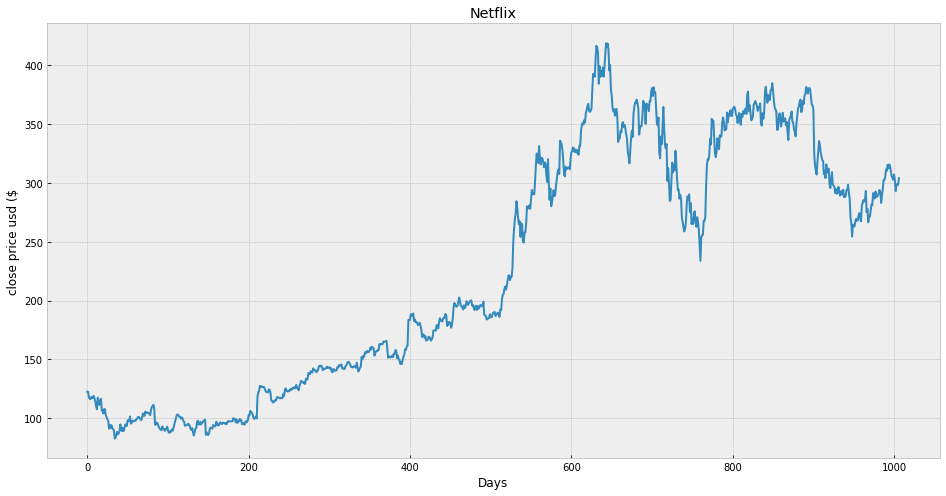

In [ ]:
#visualizing close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('close price usd ($')
plt.plot(df['Close'])
plt.show()

In [ ]:
df=df[['Close']]
df.head(4)

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997


In [ ]:
#create a variable to predict x days out into  future
future_days=25
#create a new coloumn containing (target data) shifted x units/days up
df['prediction']=df[['Close']].shift(-future_days)
df.tail(4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,prediction
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [ ]:
#create feature data set and convert it into anumpy array and want to  remove last x rows/days
x=np.array(df.drop(['prediction'],1))[:-future_days]
print(x)

[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [ ]:
#create new cell with target data y and convert it to numpy array and get all target values except last rows
y=np.array(df['prediction'])[:-future_days]
print(y)

[ 99.120003  97.830002  91.150002  94.410004  91.839996  94.089996
  91.489998  90.739998  89.709999  82.790001  83.32      86.129997
  88.449997  86.349998  87.400002  89.050003  94.760002  90.489998
  89.230003  91.93      89.120003  91.610001  94.529999  94.790001
  93.410004  98.300003  97.610001  97.93     101.580002  95.489998
  96.230003  98.        97.360001  97.660004  98.129997  97.860001
  99.349998  99.720001 101.120003 101.059998  99.839996  99.589996
  98.360001 101.209999 104.129997 102.190002 102.230003 105.699997
 104.349998 104.940002 104.830002 104.449997 103.809998 102.68
 106.980003 109.650002 110.419998 111.510002 108.400002  94.339996
  96.769997  94.980003  95.900002  93.559998  92.43      91.040001
  90.279999  90.029999  93.110001  91.540001  90.790001  89.370003
  90.839996  90.540001  92.889999  90.019997  87.739998  87.879997
  89.120003  88.629997  90.5       89.550003  92.489998  94.889999
  97.889999 100.199997 102.809998 103.300003 102.57     101.510002

In [ ]:
#split the data into 75% training and 25% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
#create models
#Decision tree regressor model
tree=DecisionTreeRegressor().fit(x_train,y_train)
#create linear Regression model
lr=LinearRegression().fit(x_train,y_train)

In [ ]:
x_future=df.drop(['prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_fututre=np.array(x_future)
x_future

,Close
957,274.459991
958,270.720001
959,267.529999
960,280.480011
961,282.929993
962,285.529999
963,284.250000
964,286.279999
965,293.350006
966,275.299988


In [ ]:
#show model tree prediction
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[294.179993 292.01001  292.859985 289.619995 295.029999 280.290009
 302.600006 253.669998 311.690002 337.589996 315.549988 312.48999
 315.929993 315.929993 309.98999  304.320007 304.320007 302.859985
 307.350006 302.5      293.119995 298.929993 298.440002 298.5
 304.209991]

[275.80844727 272.275061   269.26128041 281.49591061 283.81055122
 286.26692824 285.05763868 286.9754969  293.65494408 276.60204133
 279.20012642 268.46768635 272.79466668 273.01197146 278.03809177
 282.79965238 282.18556521 291.85990915 288.04307841 287.47621781
 293.19199272 288.62882378 289.15788554 290.08375898 291.97327541]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


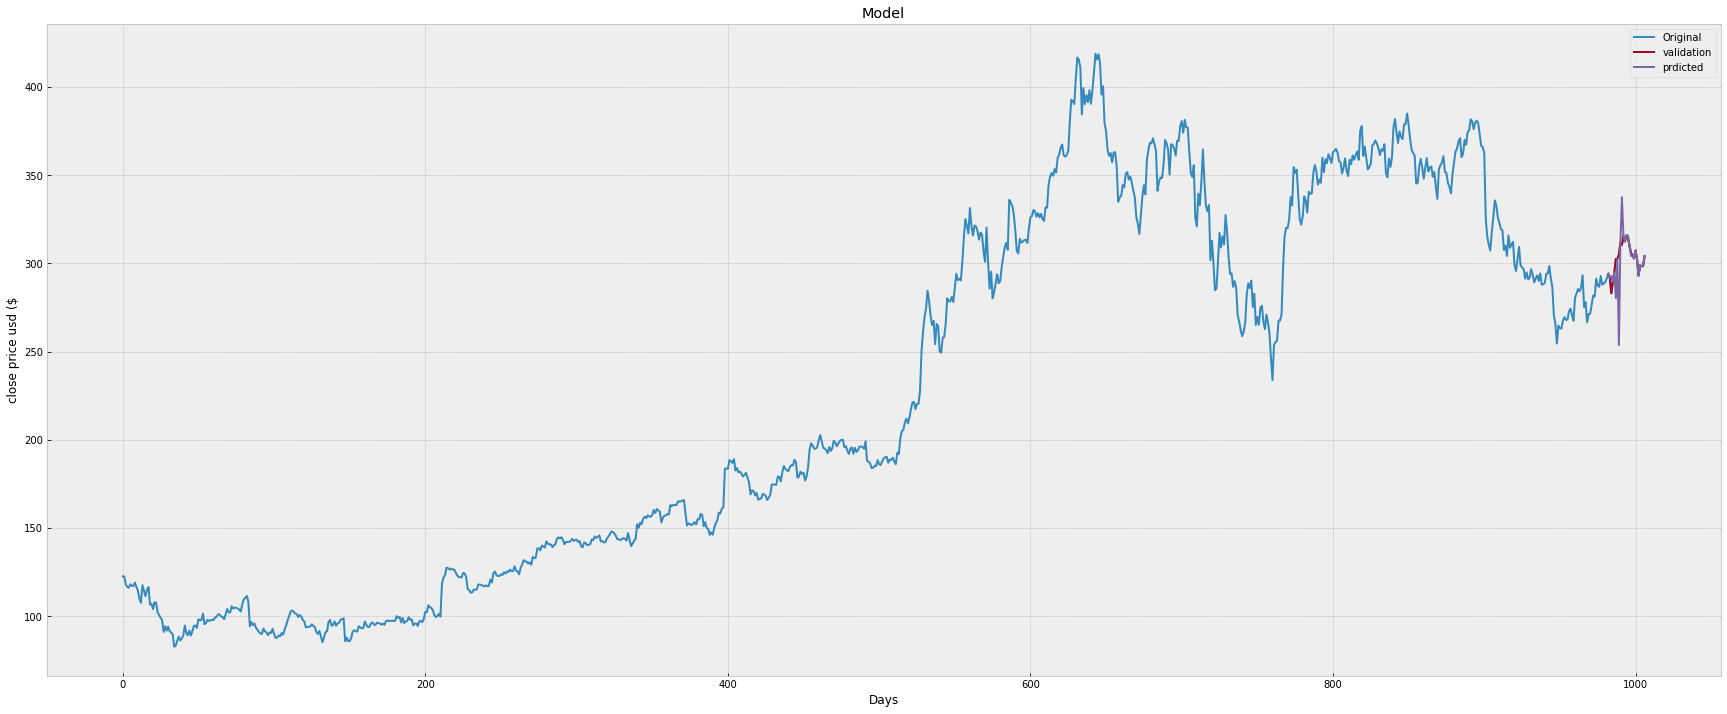

In [ ]:
predictions=tree_prediction

valid=df[x.shape[0]:]
valid['predictions']=predictions
plt.figure(figsize=(30,12))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('close price usd ($')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Original','validation','prdicted'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


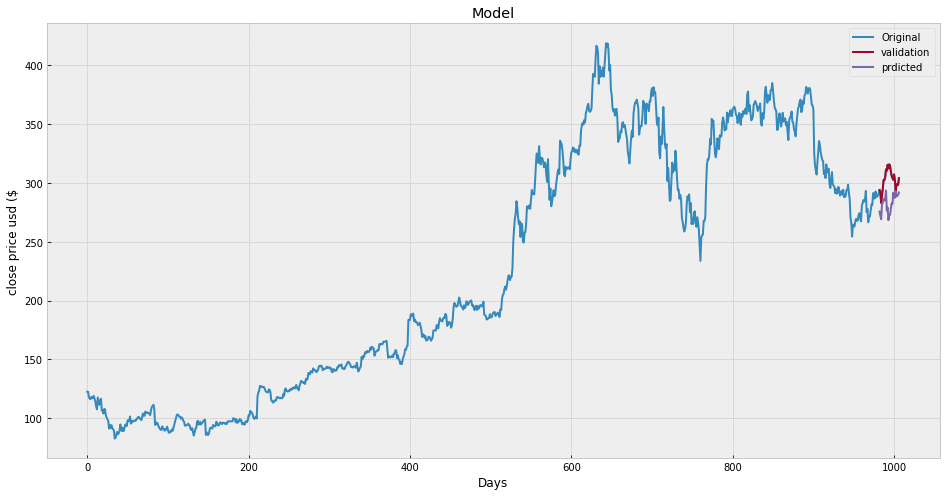

In [ ]:
predictions=lr_prediction

valid=df[x.shape[0]:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('close price usd ($')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Original','validation','prdicted'])
plt.show()